In [1]:
#htsf\Scripts\activate    

# Import libraries
import pandas as pd
import numpy as np
#import matplotlib.pylab as plt ### Remove
#plt.style.use('bmh') ### Remove

import sys, os
sys.path.append(os.path.join(os.path.dirname('__file__'), '..', 'src'))
import hyperarch
from utils import get_sample_data, plot_single

%matplotlib inline

# Read data
h_df = get_sample_data()
g_df = get_sample_data(agg_type='grouped')

Test RMSE - total: 8.319
Test RMSE - category 1: 5.241
Test RMSE - category 2: 2.287
Test RMSE - category 1_subcat 1: 6.276
Test RMSE - category 1_subcat 2: 4.304
Test RMSE - category 1_subcat 3: 4.802
Test RMSE - category 2_subcat 4: 0.756
Test RMSE - category 2_subcat 5: 1.059


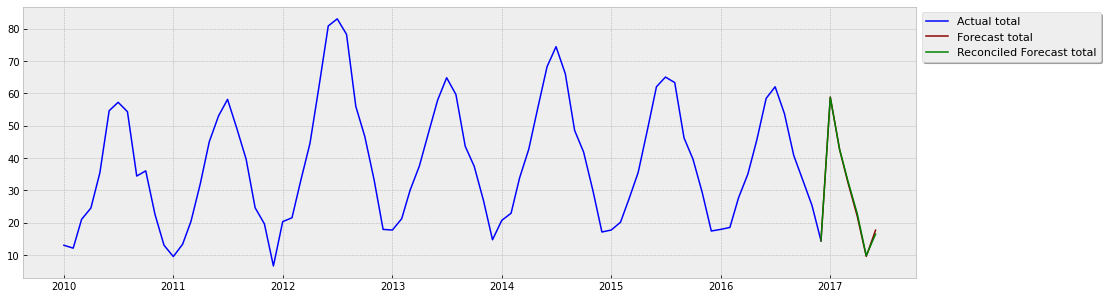

In [2]:
# Hierarchy
hierarchy_df, h_bottom, h_labels = hyperarch.get_hierarchal(h_df, 'category', 'subcategory', agg_type='hierarchy')   
h_s = hyperarch.get_S(h_bottom, h_labels, agg_type='hierarchy')
h_models = hyperarch.get_models(hierarchy_df, method='auto_arima', steps_out=6)
h_yhat = hyperarch.get_forecast_matrix(h_models)
h_reconciled_yhat = hyperarch.reconcile(h_yhat, h_s, method='ols')
hdf_pred, hdf_rec = hyperarch.predict_hier(hierarchy_df, h_yhat, h_reconciled_yhat, h_labels, h_models['index'])
plot_single(hdf_pred, hdf_rec)

Test RMSE - total: 25.287
Test RMSE - subcat 1: 7.294
Test RMSE - subcat 2: 8.923
Test RMSE - subcat 3: 15.074
Test RMSE - subcat 4: 4.484
Test RMSE - subcat 5: 3.403
Test RMSE - category 1: 11.819
Test RMSE - category 2: 32.603
Test RMSE - category 3: 28.983
Test RMSE - category 1_subcat 1: 1.422
Test RMSE - category 1_subcat 2: 1.734
Test RMSE - category 1_subcat 3: 2.404
Test RMSE - category 2_subcat 1: 10.134
Test RMSE - category 2_subcat 2: 9.098
Test RMSE - category 2_subcat 3: 2.856
Test RMSE - category 2_subcat 4: 3.106
Test RMSE - category 2_subcat 5: 3.403
Test RMSE - category 3_subcat 1: 1.065
Test RMSE - category 3_subcat 2: 3.310
Test RMSE - category 3_subcat 3: 10.398
Test RMSE - category 3_subcat 4: 1.890


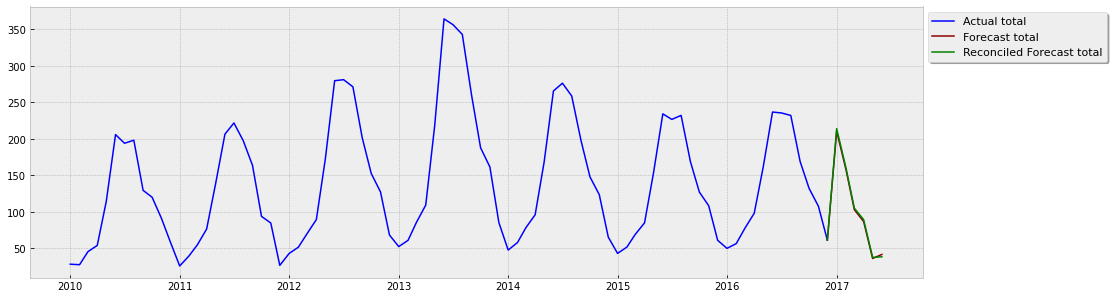

In [3]:
# Grouped
grouped_df, g_bottom, g_labels = hyperarch.get_hierarchal(g_df, 'category', 'subcategory', agg_type='grouped')   
g_s = hyperarch.get_S(g_bottom, g_labels, agg_type='grouped')
g_models = hyperarch.get_models(grouped_df, method='auto_arima', steps_out=6)
g_yhat = hyperarch.get_forecast_matrix(g_models)
g_reconciled_yhat = hyperarch.reconcile(g_yhat, g_s, method='ols')
gdf_pred, gdf_rec = hyperarch.predict_hier(grouped_df, g_yhat, g_reconciled_yhat, g_labels, g_models['index'])
plot_single(gdf_pred, gdf_rec)